# **Individual Assingment**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_customers = pd.read_csv("train_customers.csv")
test_data = pd.read_csv("test_data.csv")
train_data = pd.read_csv("train_data.csv")
train_series = pd.read_csv("train_series.csv")
train_target = pd.read_csv("train_target.csv")
submission_features = pd.read_csv("submission_features.csv")

## **A. DATA ENGINEERING (3 points)**

In [3]:
pivot_table = pd.pivot_table(train_series,
              values = ['PAY', 'BILL_AMT', 'PAY_AMT'],
              columns = ['MONTH'],
              index = ['ID'])

pivot_table.columns = [f"{col[0]}_{col[1]}" for col in pivot_table.columns.values]
train_series_pivoted = pivot_table.reset_index()

In [4]:
train_series_pivoted

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,5500.0,1000.0,6800.0,13000.0,6500.0
3,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,742.0,0.0,0.0
4,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,356.0,330.0,1140.0,341.0,1150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29993,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,29996,0.0,2580.0,6941.0,0.0,2580.0,0.0,-2.0,0.0,-1.0,1.0,-1.0,-2.0,2580.0,6941.0,0.0,0.0,0.0,0.0
19997,29997,46777.0,8824.0,9009.0,47194.0,39420.0,48381.0,0.0,0.0,0.0,0.0,0.0,0.0,1530.0,327.0,329.0,2002.0,1000.0,2000.0
19998,29998,29435.0,29434.0,16565.0,28409.0,30841.0,28530.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,331.0,0.0,2000.0,1765.0,2000.0


In [5]:
train_customers

train_customers = train_customers.merge(train_series_pivoted, on= 'ID' , how = 'inner')
train_customers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-1.0,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,330000.0,2,1,2,33,-200.0,150.0,350.0,-200.0,...,2.0,1.0,-1.0,-2.0,350.0,200.0,0.0,0.0,0.0,0.0
19996,17730,50000.0,1,2,2,49,48551.0,18077.0,18815.0,59236.0,...,0.0,0.0,0.0,0.0,2047.0,1000.0,2000.0,2000.0,5618.0,2124.0
19997,28030,410000.0,1,1,2,32,7764.0,4695.0,4133.0,3339.0,...,-1.0,-1.0,-1.0,0.0,623.0,5973.0,4421.0,10000.0,4695.0,7764.0
19998,15725,200000.0,1,1,1,40,5074.0,5606.0,2534.0,-7.0,...,-2.0,-2.0,-2.0,-2.0,19364.0,2547.0,33300.0,1772.0,5634.0,5099.0


In [6]:
train_target

,ID,DEFAULT_JULY
0,9910,0
1,15561,1
2,23607,1
3,6314,0
4,27534,0
...,...,...
19995,28636,0
19996,17730,1
19997,28030,0
19998,15725,0


In [7]:
train_customers = train_customers.merge(train_target , on= "ID" , how = "inner")
train_customers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0,0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0,1
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0,1
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0,0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,330000.0,2,1,2,33,-200.0,150.0,350.0,-200.0,...,1.0,-1.0,-2.0,350.0,200.0,0.0,0.0,0.0,0.0,0
19996,17730,50000.0,1,2,2,49,48551.0,18077.0,18815.0,59236.0,...,0.0,0.0,0.0,2047.0,1000.0,2000.0,2000.0,5618.0,2124.0,1
19997,28030,410000.0,1,1,2,32,7764.0,4695.0,4133.0,3339.0,...,-1.0,-1.0,0.0,623.0,5973.0,4421.0,10000.0,4695.0,7764.0,0
19998,15725,200000.0,1,1,1,40,5074.0,5606.0,2534.0,-7.0,...,-2.0,-2.0,-2.0,19364.0,2547.0,33300.0,1772.0,5634.0,5099.0,0


In [8]:
train_customers.to_csv("WelshGustavo_A_train.csv")

## **B. EXPLORATORY DATA ANALYSIS**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x ='EDUCATION', y = 'DEFAULT_JULY', data = train_customers )
plt.title("Education Level vs Card Default")
plt.xticks([0,1,2,3,4,5,6],['No data','Grad School','University','High School','Others','Unknown', 'Unknown'])
plt.xticks(rotation=90)
plt.show()

NameError: name 'train_customers' is not defined

With this values we can see that people whose education level is highschool has the higher probability of being a card default. This makes sense since out of the level of educations we have in this data, highschool is the lowest level. We can also see that there are 2 columns of Unknown, 1 column or Others and 1 column that dont have any data, this can all be grouped together in feature engineering.

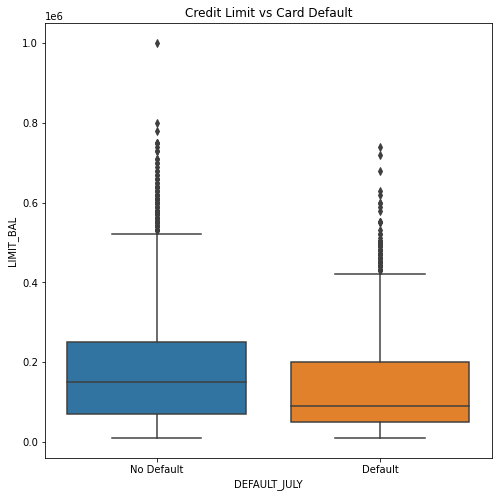

In [10]:
plt.figure(figsize = (8,8))
sns.boxplot(x ='DEFAULT_JULY', y = 'LIMIT_BAL', data = train_customers )
plt.title("Credit Limit vs Card Default")
plt.xticks([0,1],['No Default','Default'])
plt.show()

This box plot makes sense. As it is shown, the credit limit median of those people who default in July is lower than for those people who pay their loan. Overall is very clear that people who default in July, has a lower credit limit than those who dont default.

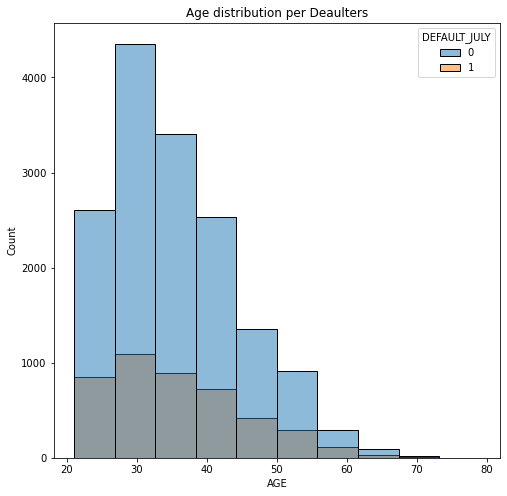

In [11]:
plt.figure(figsize = (8,8))
sns.histplot(x ='AGE', data = train_customers, bins=10, hue = 'DEFAULT_JULY')
plt.title("Age distribution per Deaulters")
plt.show()

In here we sae the histogram of the age and we are able to saw the distribution between those who default in July and those who didnt. In this case there is no significant insight, rather than the fact that people who default the most are btween 30 - 40 years, but also they are the ones that loan the most.

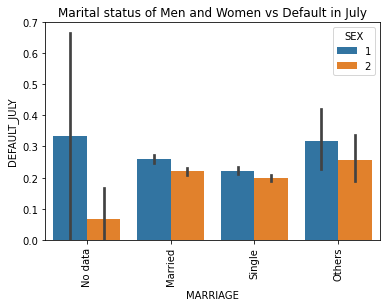

In [12]:
sns.barplot(x ='MARRIAGE', y = 'DEFAULT_JULY', data = train_customers, hue ='SEX' )
plt.title("Marital status of Men and Women vs Default in July")
plt.xticks([0,1,2,3],['No data','Married','Single','Others'])
plt.xticks(rotation=90)
plt.show()

In this case there is no sigficant difference between the marital status of people, but in all status categories, men seems default more in July than women. Similar to education, we have here some people with No data that can be grouped with others.

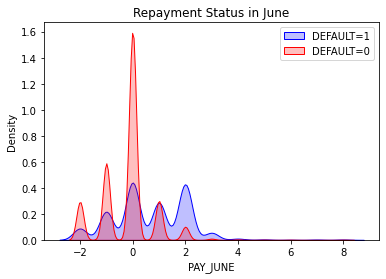

In [13]:
plt.figure()    
# Plotting the kdeplot for Attrition=1 in blue
sns.kdeplot(train_customers[train_customers['DEFAULT_JULY']==1]["PAY_JUNE"], shade=True, color='blue', label='DEFAULT=1')
# Plotting the kdeplot for Attrition=0 in red
sns.kdeplot(train_customers[train_customers['DEFAULT_JULY']==0]["PAY_JUNE"], shade=True, color='red', label='DEFAULT=0')
plt.title("Repayment Status in June")
plt.legend()
plt.show()

This third graph is interesentig in looking how, one month before, all of those who has a payment delay of 2 months or more, are the ones that default the most in July. It seems that the behavior continues throught the months, they will be keeping havind delay in payments.

## **C. MACHINE LEARNING (5 points)**

In this part, we're going to build a machine learning model to estimate the probability of default of the customers. For this part, you will need two additional datasets:



test_data.csv - Contains new data from 9000 customers with the same structure as the training data from Part 1. It contains all the features and the target already joined. You can use this data set for testing purposes (or you can build your own test set from the training set). Anyway, keep it because you will need it for question C.2
submission_features.csv - This contains data associated with unseen customers, but without the target.

SOME CONSIDERATIONS
Try several models to select the best suited for this problem
Don't forget about hyperparameter tuning to select the best configuration for the model
Don't forget to check the different metrics in each CV round to build a robust model


NOTE: Exceptionally, if you were not able to complete Part 1, you can use the train_data.csv dataset for this Part

Build a machine learning model to estimate the probability of default.

In [14]:
train_customers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,...,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,DEFAULT_JULY
0,9910,130000.0,2,2,1,27,81231.0,83773.0,85532.0,76885.0,...,0.0,0.0,0.0,3000.0,3260.0,3200.0,3500.0,3146.0,4000.0,0
1,15561,60000.0,2,3,1,48,8422.0,3910.0,2431.0,4823.0,...,-1.0,-1.0,-1.0,4377.0,2431.0,2120.0,5491.0,3918.0,9683.0,1
2,23607,330000.0,2,1,2,44,253863.0,262753.0,268145.0,243621.0,...,0.0,0.0,0.0,9400.0,9766.0,9786.0,21400.0,9542.0,0.0,1
3,6314,60000.0,2,2,2,24,15069.0,5879.0,-2879.0,29832.0,...,0.0,0.0,0.0,1000.0,1329.0,41378.0,1538.0,118.0,1308.0,0
4,27534,180000.0,2,1,2,33,178.0,0.0,1118.0,4500.0,...,-2.0,-1.0,-2.0,1500.0,1118.0,1331.0,2580.0,0.0,178.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,330000.0,2,1,2,33,-200.0,150.0,350.0,-200.0,...,1.0,-1.0,-2.0,350.0,200.0,0.0,0.0,0.0,0.0,0
19996,17730,50000.0,1,2,2,49,48551.0,18077.0,18815.0,59236.0,...,0.0,0.0,0.0,2047.0,1000.0,2000.0,2000.0,5618.0,2124.0,1
19997,28030,410000.0,1,1,2,32,7764.0,4695.0,4133.0,3339.0,...,-1.0,-1.0,0.0,623.0,5973.0,4421.0,10000.0,4695.0,7764.0,0
19998,15725,200000.0,1,1,1,40,5074.0,5606.0,2534.0,-7.0,...,-2.0,-2.0,-2.0,19364.0,2547.0,33300.0,1772.0,5634.0,5099.0,0


**Checking how balanced is the dataset**

In [15]:
train_customers["DEFAULT_JULY"].value_counts()

0    15580
1     4420
Name: DEFAULT_JULY, dtype: int64

It seems as this dataset is a bit inbalanced, because of this we are going to use the AUC ROC score.

## Feature Engineering 

To start Im going to deal with insights we saw in both Education and Marriage in the excercise above

In [16]:
train_customers["EDUCATION"] = np.where((train_customers["EDUCATION"] == 0) | (train_customers["EDUCATION"] == 5) | (train_customers["EDUCATION"] == 6) , 4, train_customers["EDUCATION"]  )
test_data["EDUCATION"] = np.where((test_data["EDUCATION"] == 0) | (test_data["EDUCATION"] == 5) | (test_data["EDUCATION"] == 6) , 4, test_data["EDUCATION"]  )

In [17]:
train_customers["MARRIAGE"] = np.where((train_customers["MARRIAGE"] == 0)  , 3, train_customers["MARRIAGE"] )
test_data["MARRIAGE"] = np.where((test_data["MARRIAGE"] == 0)  , 3, test_data["MARRIAGE"] )

Now that it is done, we check for some KDE plots, this to see if there is a different behavior of each feature when comparing with Default or no Default.

**SKD PLOT**

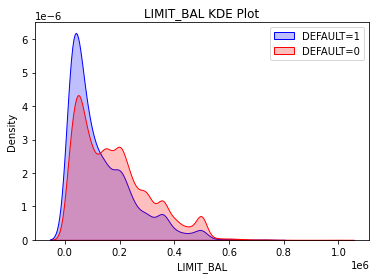

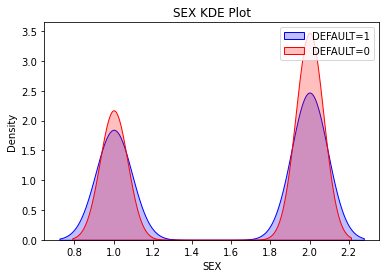

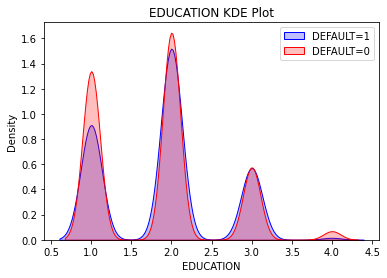

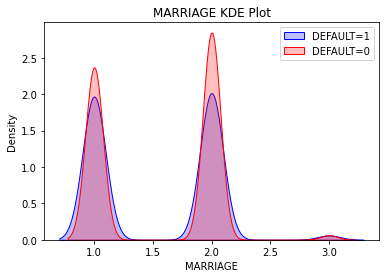

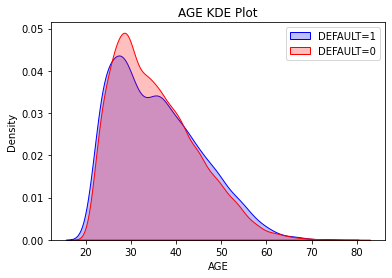

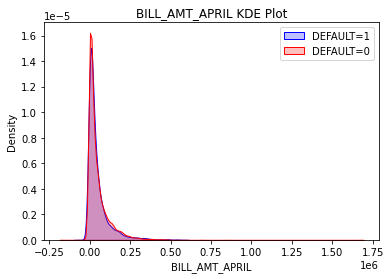

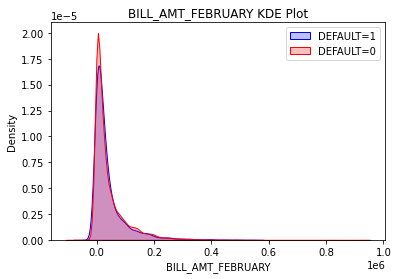

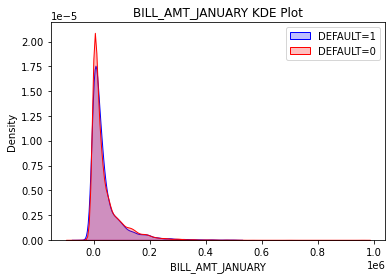

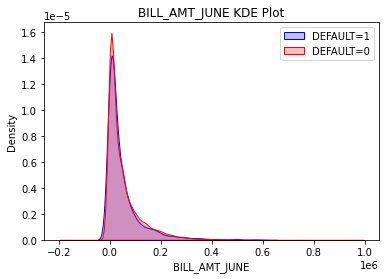

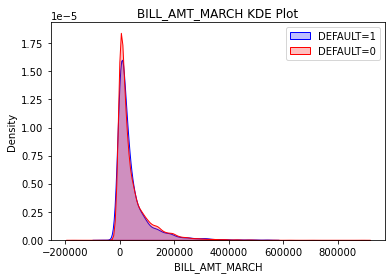

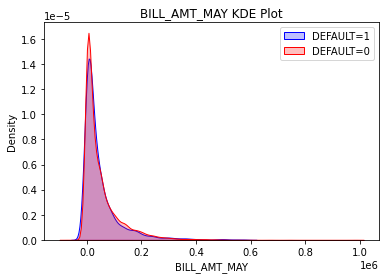

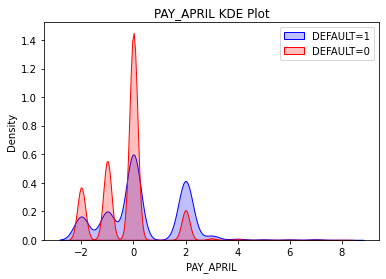

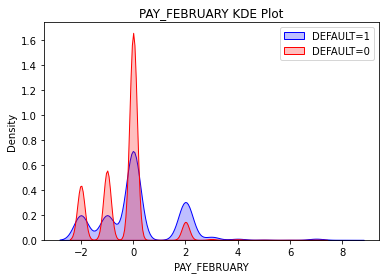

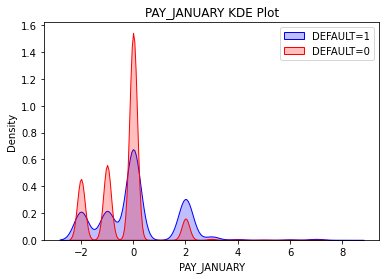

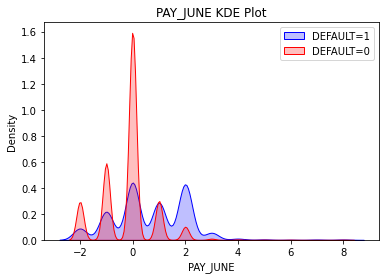

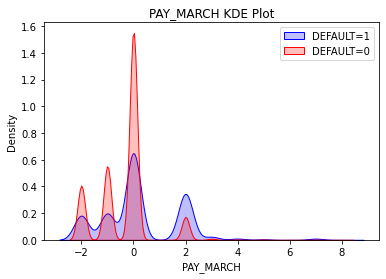

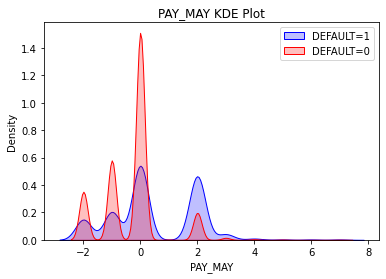

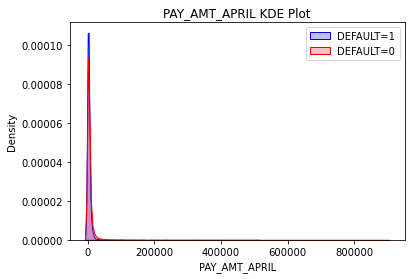

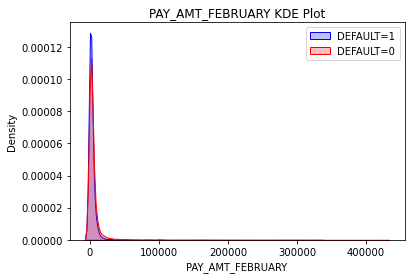

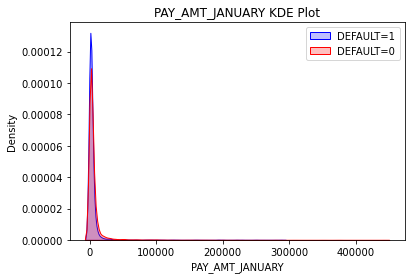

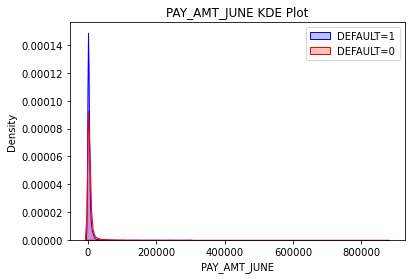

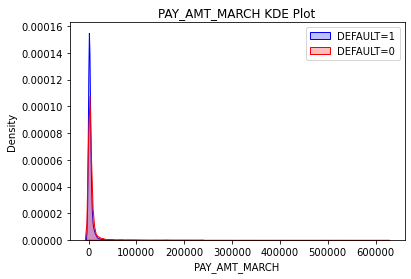

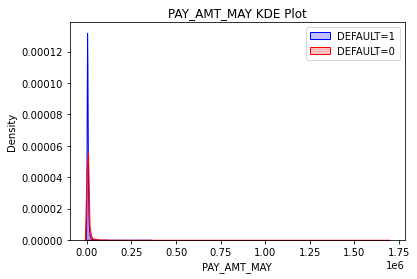

In [18]:
for col in train_customers.drop(columns = ["ID", "DEFAULT_JULY"], axis = 1).columns:

    plt.figure()

    sns.kdeplot(train_customers[train_customers['DEFAULT_JULY']==1][col], shade=True, color='blue', label='DEFAULT=1')
    sns.kdeplot(train_customers[train_customers['DEFAULT_JULY']==0][col], shade=True, color='red', label='DEFAULT=0')
    plt.title(f"{col} KDE Plot")
    plt.legend()
    
    plt.show()

As seen in the graph, there is some features that after or before some threshold there is a different behavior of Default, because of this I decides to create a varible `Prob_Default` which will take into consideration `LIMIT_BAL`, `PAY_APRIL`, `PAY_MAY` and `PAY_JUNE`, this because are the ones that has the highest difference between Default 1 and 0

In [19]:
import numpy as np
train_customers["Prob_Default"] = np.where((train_customers["LIMIT_BAL"] <= 100000) & ((train_customers["PAY_APRIL"] > 1)& (train_customers["PAY_MAY"] > 1) & (train_customers["PAY_JUNE"] > 1)) , 1,0)
submission_features["Prob_Default"] = np.where((submission_features["LIMIT_BAL"] <= 100000) &((submission_features["PAY_APRIL"] > 1) & (submission_features["PAY_MAY"] > 1) & (submission_features["PAY_JUNE"] > 1)) , 1,0)
test_data["Prob_Default"] = np.where((test_data["LIMIT_BAL"] <= 100000) &((test_data["PAY_APRIL"] > 1) & (test_data["PAY_MAY"] > 1) & (test_data["PAY_JUNE"] > 1)) , 1,0)

In [20]:
train_customers["Prob_Default"].value_counts()

0    19237
1      763
Name: Prob_Default, dtype: int64

Lastly I create two new variable `MEAN_BILL` and `PAY_MEAN` for having more information about this

In [59]:
bill_cols = ['BILL_AMT_APRIL', 'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY',
             'BILL_AMT_JUNE', 'BILL_AMT_MAY']

train_customers['MEAN_BILL'] = train_customers[bill_cols].mean(axis=1)
submission_features['MEAN_BILL'] = submission_features[bill_cols].mean(axis=1)
test_data['MEAN_BILL'] = test_data[bill_cols].mean(axis=1)

In [63]:
pay_cols = ['PAY_AMT_APRIL', 'PAY_AMT_FEBRUARY', 'PAY_AMT_JANUARY',
             'PAY_AMT_JUNE', 'PAY_AMT_MAY']

train_customers["PAY_MEAN"] = train_customers[pay_cols].mean(axis = 1)
submission_features['PAY_MEAN'] = submission_features[pay_cols].mean(axis=1)
test_data['PAY_MEAN'] = test_data[pay_cols].mean(axis=1)

**Train Test Split**

In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_customers.drop(["ID","DEFAULT_JULY"], axis=1), 
                                                    train_customers["DEFAULT_JULY"], 
                                                    test_size=0.2, 
                                                    random_state=42)

## Random Forest

In [24]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, roc_auc_score, recall_score, confusion_matrix, accuracy_score

**Grid Search with 3 folds validation**

In [25]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,12,15],
    'n_estimators': [100,500],
    'min_samples_leaf': [7,9],
    'max_features': ['sqrt']
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 3,cv = 3, scoring = "roc_auc", n_jobs = -1)    
grid_rfc = grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'n_estimators': 500}


In [26]:
mean_score = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
std_score = grid_search.cv_results_["std_test_score"][grid_search.best_index_]

In [27]:
print(f"Mean: {mean_score}")
print(f"Std: {std_score}")

Mean: 0.7772008578385075
Std: 0.006175456795729167


In [28]:
rfc = RandomForestClassifier(bootstrap = True, max_depth = 12, max_features = 'sqrt', min_samples_leaf = 9, n_estimators = 500)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba((X_test))[:,1]

In [29]:
score = roc_auc_score(y_test, y_pred)
print(f"ROC:  {score}")


ROC:  0.7885848739203638


**Feature Importance**

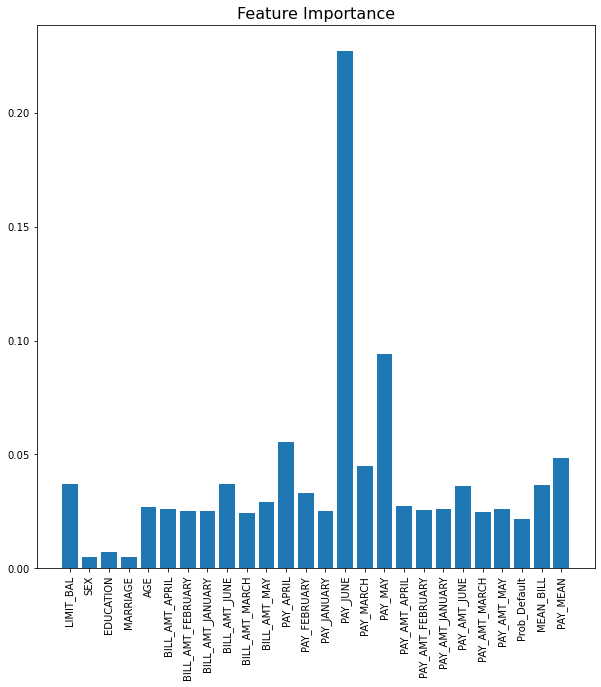

In [30]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, rfc.feature_importances_)
plt.title('Feature Importance', fontsize=16);
plt.xticks(rotation=90)
plt.show()

## XGB

**Grid Search with 3 folds validation**

In [31]:
param_grid = {
    'max_depth': [5,7],
    'gamma' : [1 ,2],
    'colsample_bytree' : [.5,1],
    'subsample': [.5,.8,1],
    'n_estimators': [500],
    'learning_rate': [0.01, 0.05]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3,verbose = 1,scoring = "roc_auc", n_jobs = -1)    
grid_search.fit(X_train, y_train)


#best parameter after tuning
print(grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'colsample_bytree': 0.5, 'gamma': 2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


In [47]:
mean_score = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
std_score = grid_search.cv_results_["std_test_score"][grid_search.best_index_]

In [48]:
print(f"Mean: {mean_score}")
print(f"Std: {std_score}")

Mean: 0.7794013803643183
Std: 0.005465423864708215


In [34]:
xgb = XGBClassifier(colsample_bytree = 0.8, max_depth = 5, subsample = .5, gamma =2, learning_rate = 0.01, n_estimators = 500)
xgb.fit(X_train, y_train)
y_pred = xgb.predict_proba((X_test))[:,1]

In [35]:
score = roc_auc_score(y_test, y_pred)
print(f"ROC:  {score}")


ROC:  0.7858067651710415


**Feature Importance**

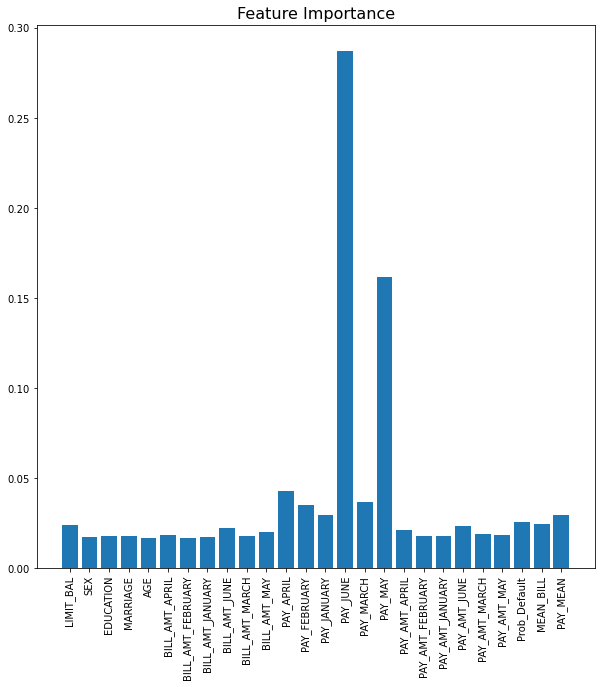

In [36]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, xgb.feature_importances_)
plt.title('Feature Importance', fontsize=16);
plt.xticks(rotation=90)
plt.show()

## Correlation

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_customers.corr()

<AxesSubplot:>

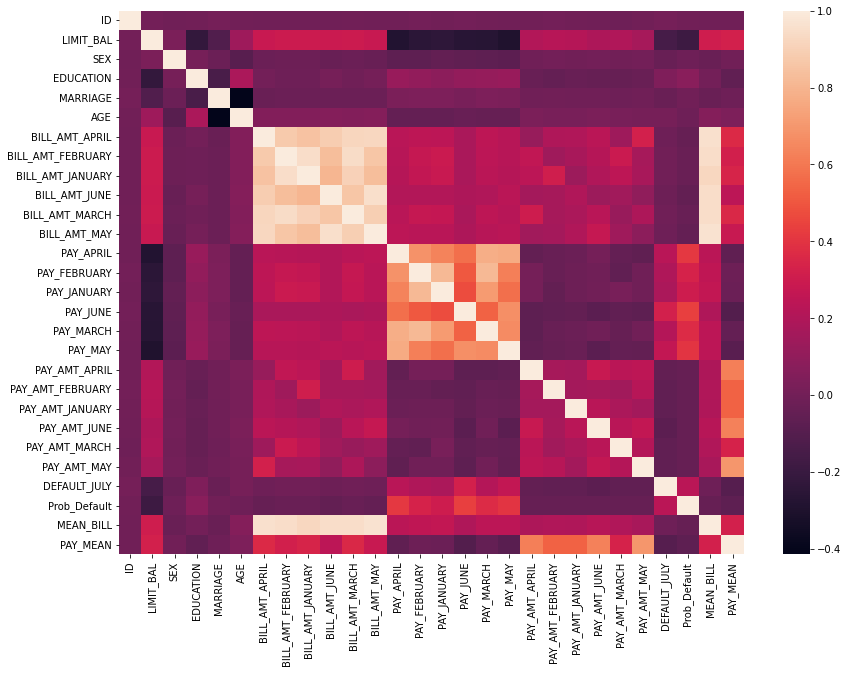

In [38]:
plt.figure(figsize = (14,10))
sns.heatmap(corr)

Because there is some correlation between the features, it is possible to do some PCA to reduce the number of components

## PCA

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [40]:
pca_customers = PCA()

principalComponents_customers = pca_customers.fit_transform(train_customers)
pd.DataFrame(principalComponents_customers).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,-2.842717e-12,-1.645822e-12,2.767592e-12,-4.666617e-13,4.665253e-13,-5.373295e-13,-2.355591e-13,-5.316906e-13,-3.183573e-13,4.474714e-13,...,-4.927586e-17,2.787215e-17,-1.773026e-17,-1.039613e-16,-9.478529e-19,3.876066e-17,-5.534462e-18,-8.265610e-18,7.246464e-12,-1.660285e-12
std,1.779080e+05,1.176457e+05,3.764175e+04,2.906495e+04,2.266160e+04,2.096143e+04,1.884350e+04,1.722067e+04,1.515467e+04,1.153643e+04,...,7.086321e-01,5.982169e-01,5.163225e-01,4.919636e-01,4.603738e-01,4.172700e-01,3.860352e-01,1.633274e-01,7.867396e-11,1.554411e-11
min,-1.870660e+05,-4.077082e+05,-5.068865e+05,-2.408049e+05,-2.314661e+05,-3.552726e+05,-3.337696e+05,-3.463617e+05,-3.898629e+05,-2.275300e+05,...,-1.900162e+00,-3.390175e+00,-3.491752e+00,-1.042193e+00,-1.180370e+00,-2.726839e+00,-1.322417e+00,-6.980449e-01,-4.045219e-09,-8.822171e-10
25%,-1.076270e+05,-9.447807e+04,-7.354457e+03,-7.255534e+03,-8.085513e+03,-2.891725e+03,-2.201303e+03,-1.445113e+03,-8.989391e+02,-1.212244e+03,...,-6.092359e-01,-1.300046e-01,-1.153405e-01,-4.217734e-01,-2.906463e-01,-5.156839e-02,-7.157510e-02,-5.887334e-02,-1.104947e-11,-4.593643e-12
50%,-5.830426e+04,-4.489244e+04,1.230494e+03,-2.610280e+03,-2.812865e+03,-2.204757e+02,-2.193356e+02,4.242032e+00,6.233748e+02,6.959126e+02,...,2.415137e-02,-3.656425e-02,1.509337e-03,-7.357426e-02,-5.166894e-02,1.671684e-03,1.529616e-01,-2.455903e-02,6.167134e-12,-1.331943e-12
75%,3.959768e+04,7.406795e+04,1.057722e+04,2.488890e+03,1.817815e+03,3.083737e+03,1.883815e+03,1.476978e+03,2.881918e+03,2.630811e+03,...,3.938056e-01,1.721095e-01,1.333402e-01,3.983118e-01,3.621737e-01,6.840099e-02,2.408820e-01,2.926608e-02,2.400847e-11,1.728215e-12
max,2.363689e+06,6.196410e+05,6.753636e+05,2.019942e+06,1.342377e+06,6.813301e+05,5.466300e+05,3.739889e+05,4.995013e+05,2.571895e+05,...,2.823767e+00,3.469557e+00,3.742086e+00,1.598976e+00,2.102135e+00,2.904845e+00,1.329884e+00,8.108641e-01,7.491128e-09,9.564726e-10


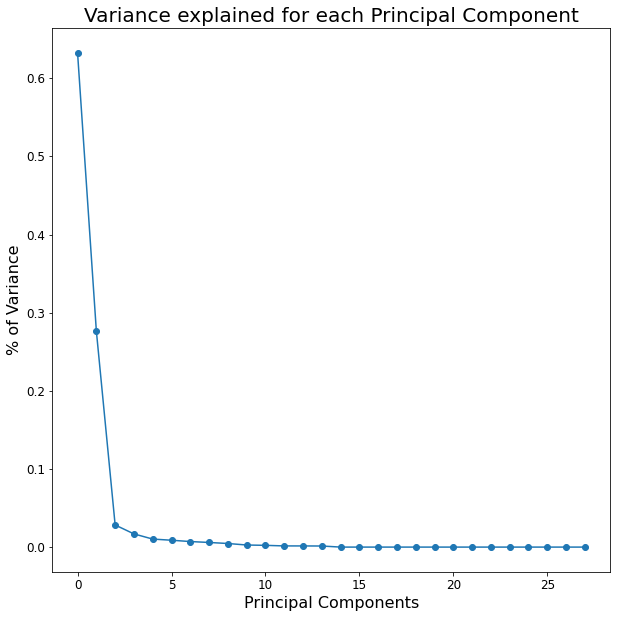

In [41]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca_customers.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

It seems like between 9 or 10 components, it is possible to explain Default_July, in this case I'll choose 9.

In [42]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('rf', RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(train_customers.drop(["ID","DEFAULT_JULY"], axis=1), 
                                                    train_customers["DEFAULT_JULY"], 
                                                    test_size=0.2, 
                                                    random_state=42)


#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":[9],
     'rf__bootstrap': [True],
     'rf__n_estimators': [100, 500],
     'rf__max_features': ['sqrt'],
     'rf__min_samples_leaf': [5, 10],
     'rf__max_depth': [10,12]         
    }

estimator = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose = 1) 
estimator.fit(X_train, y_train)
print("Grid Search Finished")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Grid Search Finished


In [43]:
estimator.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('rf',
                 RandomForestClassifier(max_depth=10, max_features='sqrt',
                                        min_samples_leaf=10,
                                        n_estimators=500))])

In [44]:
estimator.best_score_

0.8061249750494107

In [45]:
y_pred = estimator.predict_proba((X_test))[:,1]

In [46]:
score = roc_auc_score(y_test, y_pred)
print(f"ROC:  {score}")


ROC:  0.7654365027772033


PCA looks like a good approach, but comparing with other models, the score was worst. In this case I will go with the XGBoost model since it have a very good score and a small std between the 3 folds in the cross validation

## **Question 2**

(1 points)

Which five of 1000 clients from the submission set are most likely to repay the loan if it were granted?

In [64]:
submission_features
submission_id = submission_features["ID"]
submission_X = submission_features.drop(["ID"], axis=1)

In [66]:
submission_X_order = submission_X[X_train.columns] #Getting the same order of column for predicting

In [67]:
y_pred_test = xgb.predict_proba(submission_X_order)[:,1] #Using XGB for the prediction

In [68]:
result_df = pd.DataFrame({'ID': submission_id, 'probability': y_pred_test})
result_df.to_csv("WelshGustavo_C1_submission.csv")

In [69]:
result_df.sort_values(by='probability', ascending=True).head()

,ID,probability
851,2665,0.029693
185,9331,0.030383
889,17142,0.030397
294,5735,0.031475
371,18221,0.032590


### **Question 3**

(2.5 points)

Now the bank wants to optimize the decision-making process by establishing the optimal threshold for the model in order to effectively take the decision about when to issue the credit and when not. So, taking into account the following numbers:



A customer who received a loan but doesn't repay costs 5000 to the bank \
A customer who receives a loan and repays, make a profit of 1000 to the bank \
If the credit is not issued, then there is no profit or loss


What's the best threshold you should consider to maximize the profit?

In [70]:
test_data_X = test_data.drop(columns = ["ID","DEFAULT_JULY"], axis = 1)
test_data_y = test_data["DEFAULT_JULY"]

In [71]:
test_data_X_order = test_data_X[X_train.columns]

In [78]:
y_pred_test_data = xgb.predict_proba(test_data_X_order)[:,1]

In [79]:
test_df = pd.DataFrame({'ID': test_data["ID"], 'probability': y_pred_test_data})
test_df

,ID,probability
0,11316,0.149756
1,26420,0.221186
2,7847,0.087372
3,8083,0.103942
4,7455,0.504878
...,...,...
8995,26591,0.099563
8996,10501,0.709055
8997,5883,0.201225
8998,12403,0.061413


In [80]:
thresholds = np.linspace(0, 1, 101)

max_profit = 0

#Checking for each threshold the amount of profit and printing the one that maximized the profit
for threshold in thresholds:
    y_pred_t = np.where(y_pred_test_data <= threshold, 0,1)
    pred_df = pd.DataFrame({'y_pred': y_pred_t, 'y_test': test_data_y})
    pred_df["profit"] = np.where((pred_df["y_pred"] == 0) & (pred_df["y_test"] == 0), 1000, np.where((pred_df["y_pred"] == 0) & (pred_df["y_test"] == 1), -5000, 0))
    max_profit_1 = pred_df["profit"].sum()
    
    if max_profit_1 > max_profit:
        max_profit = max_profit_1
        threshold_profit = threshold
    
print(f"Threshold: {threshold_profit} , profit: {max_profit}")
    

Threshold: 0.19 , profit: 2133000
